# Smart Certification

The given data set **goodforu-class12** has been collected as a part of a survey exercise done by a leading snacks manufacturer. This snacks manufacturer produces 6 different brands. The actual brand names have been masked and are present in the dataset as Brand A, Brand B, Brand C, Brand D, Brand E and Brand F. There is also a data dictionary named **goodforu-variable-descriptions-class13.xlsx**. This manufacturer is interested in finding out what factors affect the perception for Brand A. Here dependent variable & Independent variables are both Categorical. Thus, we will use **Logistic Regression**.

In [1]:
# Setting the path of the working directory

import os
os.chdir('C:/Users/Admin/Desktop/Data Science/03. Directory/01. Jigsaw - FSDS/02. Data/01. CSV files')

In [2]:
# Importing some commonly required package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

In [3]:
# Read the goodforu-class12 datafile from working directory

goodforu = pd.read_csv ("goodforu-class12.csv",na_values = ["", " ","NA","N/A"])

In [4]:
goodforu.head()

,Panel ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62
0,1,2,2,1,2,2,2,2,2,2,...,4,4,3,4,4,4,4,4,4,3
1,2,1,1,2,1,2,1,2,2,2,...,3,4,4,3,4,4,4,3,4,4
2,3,2,2,1,1,2,2,1,2,2,...,5,5,5,4,5,4,5,4,3,5
3,4,1,1,1,1,2,1,1,1,1,...,5,4,3,5,4,3,3,3,2,4
4,5,1,1,1,1,1,1,1,1,1,...,4,5,4,4,3,3,4,1,1,3


In [5]:
# Data Exploration.  

goodforu.describe() #The original dataset has 61 variables and 24114 observations.

,Panel ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62
count,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,...,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000
mean,12057.500000,1.175790,1.206851,1.154889,1.136891,1.634196,1.171850,1.077465,1.641660,1.683794,...,3.725305,4.434644,3.571411,3.678734,2.414946,2.455462,3.488140,3.006055,2.327569,3.541511
std,6961.256532,0.380649,0.405056,0.361807,0.343740,0.481665,0.377258,0.267334,0.479523,0.465004,...,1.142964,0.756988,1.083300,1.109599,1.119013,1.133825,1.199834,1.231694,1.093549,1.167066
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6029.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,4.000000,3.000000,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,3.000000
50%,12057.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,4.000000,5.000000,4.000000,4.000000,2.000000,2.000000,4.000000,3.000000,2.000000,4.000000
75%,18085.750000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,5.000000,5.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000
max,24114.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# Data preparation for Brand A. Refer to goodforu-variable-descriptions-class13.xlsx to identify that there are 5 variables 
# corresponding to Brand A namely: X2, X9, X16, X23, and X30

goodforu_Brand_A = goodforu[['X2', 'X9', 'X16', 'X23', 'X30']]

In [7]:
goodforu_Brand_A.head()

,X2,X9,X16,X23,X30
0,2,2,2,9,1
1,1,2,2,6,9
2,2,2,2,2,3
3,1,1,1,2,3
4,1,1,1,8,5


In [8]:
# Sanity check of Data_Brand_A

goodforu_Brand_A.describe()

,X2,X9,X16,X23,X30
count,24114.000000,24114.000000,24114.000000,24114.000000,24114.000000
mean,1.206851,1.683794,1.558555,4.327445,4.336112
std,0.405056,0.465004,0.496570,2.086072,2.167850
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,3.000000,3.000000
50%,1.000000,2.000000,2.000000,4.000000,5.000000
75%,1.000000,2.000000,2.000000,6.000000,6.000000
max,2.000000,2.000000,2.000000,10.000000,10.000000


In [9]:
goodforu_Brand_A.isnull().sum()

X2     0
X9     0
X16    0
X23    0
X30    0
dtype: int64

In [10]:
goodforu_Brand_A.isna().sum()

X2     0
X9     0
X16    0
X23    0
X30    0
dtype: int64

In [11]:
# Using more appropriate names
## X2: Brand A chips: Are made with farm grown ingredients like potato, corn or wheat?
## X9: Brand A chips: Have zero grams trans fat
## X16: Brand A chips: Are made with natural oils
## X23: Brand A chips : Rate the following 10 = good for you, 1 = bad for you
## X30: Brand A chips : 10 = minimallyProcessed / 1 = Heavily processed on a 10 point scale

pd.options.mode.chained_assignment = None  # default='warn'
goodforu_Brand_A.rename(columns = {'X2' : 'Farm_Grown_Ingredients',
                                   'X9' : 'Zero_Grams_Trans_Fat', 
                                   'X16' : 'Made_With_Natural_Oils',
                                   'X23' : 'Rating', 
                                   'X30' : 'Process'},inplace = True)

In [12]:
goodforu_Brand_A.head()

,Farm_Grown_Ingredients,Zero_Grams_Trans_Fat,Made_With_Natural_Oils,Rating,Process
0,2,2,2,9,1
1,1,2,2,6,9
2,2,2,2,2,3
3,1,1,1,2,3
4,1,1,1,8,5


In [13]:
# Create a new target variables: Target_Rating corresponding to variables Rating.

## Target_Rating: The score of 5 or more means people has a good perception & score of less than 5 means people has a bad 
## perception. Target_Rating = 1 => Good Perception & Target_Rating  = 0 => Bad perception

goodforu_Brand_A['Target_Rating'] = goodforu_Brand_A['Rating'].map(lambda x : 1 if x >= 5 else 0)

In [14]:
goodforu_Brand_A.head()

,Farm_Grown_Ingredients,Zero_Grams_Trans_Fat,Made_With_Natural_Oils,Rating,Process,Target_Rating
0,2,2,2,9,1,1
1,1,2,2,6,9,1
2,2,2,2,2,3,0
3,1,1,1,2,3,0
4,1,1,1,8,5,1


In [15]:
# Now drop the variables Rating & Process

goodforu_Brand_A = goodforu_Brand_A.drop(['Rating'],axis = 1)

In [16]:
goodforu_Brand_A.head()

,Farm_Grown_Ingredients,Zero_Grams_Trans_Fat,Made_With_Natural_Oils,Process,Target_Rating
0,2,2,2,1,1
1,1,2,2,9,1
2,2,2,2,3,0
3,1,1,1,3,0
4,1,1,1,5,1


In [17]:
## Split the data into test and train

goodforu_Brand_A_train = goodforu_Brand_A.sample(frac = 0.80, random_state = 200)
goodforu_Brand_A_test = goodforu_Brand_A.drop(goodforu_Brand_A_train.index)

In [18]:
## Build Model

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [19]:
model1 = smf.glm("Target_Rating ~ Farm_Grown_Ingredients + Zero_Grams_Trans_Fat + Made_With_Natural_Oils + Process",
                 data = goodforu_Brand_A_train, family = sm.families.Binomial()).fit()

In [20]:
print(model1.summary()) # Note: All the variables are significant

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Target_Rating   No. Observations:                19291
Model:                            GLM   Df Residuals:                    19286
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11130.
Date:                Fri, 25 Sep 2020   Deviance:                       22261.
Time:                        19:47:40   Pearson chi2:                 1.99e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [21]:
# Model Validation

import sklearn.metrics as metrics

In [22]:
y_true = goodforu_Brand_A_test['Target_Rating']
y_pred = model1.predict(goodforu_Brand_A_test)

In [23]:
y_pred.head()

3     0.467851
4     0.687703
5     0.607655
17    0.514160
18    0.514160
dtype: float64

In [24]:
y_true = goodforu_Brand_A_test['Target_Rating']
y_pred = model1.predict(goodforu_Brand_A_test).map(lambda x: 1 if x > 0.5 else 0)
metrics.confusion_matrix(y_true,y_pred)

array([[1671,  710],
       [ 683, 1759]], dtype=int64)

In [25]:
## ROC curve

y_score = model1.predict(goodforu_Brand_A_test)
fpr,tpr,threshold = metrics.roc_curve(y_true,y_score)
x,y = np.arange(0,1.1,0.1), np.arange(0,1.1,0.1)

Text(0.5, 0, 'False Positive Rate')

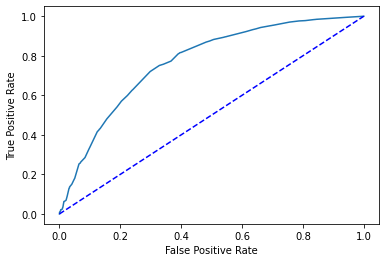

In [69]:
plt.plot(fpr,tpr,'-')
plt.plot(x,y,'b--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [27]:
## AUC

metrics.roc_auc_score(y_true,y_score)

0.7682609492773289

In [28]:
## Gains

goodforu_Brand_A_test['Prob'] = model1.predict(goodforu_Brand_A_test)

In [29]:
goodforu_Brand_A_test.head()

,Farm_Grown_Ingredients,Zero_Grams_Trans_Fat,Made_With_Natural_Oils,Process,Target_Rating,Prob
3,1,1,1,3,0,0.467851
4,1,1,1,5,1,0.687703
5,1,2,1,5,1,0.607655
17,1,2,2,5,0,0.514160
18,1,2,2,5,1,0.514160


In [61]:
goodforu_Brand_A_test['Prob_Deciles'] = pd.qcut(goodforu_Brand_A_test['Prob'],q = 20,duplicates = 'drop')

In [62]:
goodforu_Brand_A_test.head()

,Farm_Grown_Ingredients,Zero_Grams_Trans_Fat,Made_With_Natural_Oils,Process,Target_Rating,Prob,Prob_Deciles
3,1,1,1,3,0,0.467851,"(0.451, 0.487]"
4,1,1,1,5,1,0.687703,"(0.626, 0.688]"
5,1,2,1,5,1,0.607655,"(0.582, 0.608]"
17,1,2,2,5,0,0.514160,"(0.487, 0.514]"
18,1,2,2,5,1,0.514160,"(0.487, 0.514]"


In [63]:
goodforu_Brand_A_test.sort_values('Prob',ascending = False).head()

,Farm_Grown_Ingredients,Zero_Grams_Trans_Fat,Made_With_Natural_Oils,Process,Target_Rating,Prob,Prob_Deciles
4371,1,1,1,10,1,0.956263,"(0.86, 0.956]"
21566,1,1,1,10,1,0.956263,"(0.86, 0.956]"
1058,1,1,1,10,1,0.956263,"(0.86, 0.956]"
13489,1,1,1,10,1,0.956263,"(0.86, 0.956]"
23231,1,1,1,10,1,0.956263,"(0.86, 0.956]"


In [64]:
gains = goodforu_Brand_A_test.groupby("Prob_Deciles",as_index=False)['Target_Rating'].agg(['sum','count']).reset_index().sort_values("Prob_Deciles", ascending=False)

In [65]:
gains.columns = ["Deciles","TotalEvents","NumberObs"]

In [66]:
gains["PercEvents"] = gains['TotalEvents'] / gains['TotalEvents'].sum()

In [67]:
gains["CumulativeEvents"] = gains.PercEvents.cumsum()

In [68]:
gains

,Deciles,TotalEvents,NumberObs,PercEvents,CumulativeEvents
18,"(0.86, 0.956]",169,221,0.069206,0.069206
17,"(0.795, 0.86]",198,243,0.081081,0.150287
16,"(0.777, 0.795]",74,97,0.030303,0.180590
15,"(0.71, 0.777]",255,335,0.104423,0.285012
14,"(0.688, 0.71]",134,174,0.054873,0.339885
13,"(0.626, 0.688]",239,324,0.097871,0.437756
12,"(0.608, 0.626]",105,151,0.042998,0.480753
11,"(0.582, 0.608]",219,333,0.089681,0.570434
10,"(0.514, 0.582]",142,231,0.058149,0.628583
9,"(0.487, 0.514]",299,507,0.122441,0.751024


# Questions and Answers from the Assignment Quiz

The first thing that the manufacturer is interested in is, knowing how people perceive his brand with regards to the usage of farm ingredients, zero trans-fat and the use of natural oils. Answer the following questions keeping this context in mind. 

*Note: In the data set, label of 1 means that the responded answered ‘Yes’ and a label of 2 means that the responded answered as ‘No’*

In [38]:
#Q1: From the survey data, how many people believed that Brand A is manufactured with farm ingredients.
#Answer: 19126

goodforu_Brand_A[goodforu_Brand_A['Farm_Grown_Ingredients']==1].shape[0]

19126

In [39]:
# About 79% people believe that Brand A is manufactured with farm ingredients.

(goodforu_Brand_A[goodforu_Brand_A['Farm_Grown_Ingredients']==1].shape[0]/goodforu_Brand_A.shape[0])*100

79.3149207929004

In [40]:
#Q2: From the survey data, how many people believed that Brand A is manufactured with natural oils? 
#Answer: 10645

goodforu_Brand_A[goodforu_Brand_A['Made_With_Natural_Oils']==1].shape[0]

10645

In [41]:
# About 44% people believe that Brand A is manufactured with Natural_Oils.

(goodforu_Brand_A[goodforu_Brand_A['Made_With_Natural_Oils']==1].shape[0]/goodforu_Brand_A.shape[0])*100

44.14448038483868

In [42]:
#Q3: From the survey data, how many people believed that Brand A is manufactured with ingredients having zero-gram trans-fat?
#Answer: 7625

goodforu_Brand_A[goodforu_Brand_A['Zero_Grams_Trans_Fat'] == 1].shape[0]

7625

In [43]:
# About 32% people believe that Brand A has Zero Grams of Trans Fat.

(goodforu_Brand_A[goodforu_Brand_A['Zero_Grams_Trans_Fat'] == 1].shape[0]/goodforu_Brand_A.shape[0])*100

31.620635315584305

The manufacturer is also interested in figuring out what is the overall perception about Brand A as well as finding out if a specific set of factors drive brand perception.

In [44]:
#Q4: The variable denoting overall perception for Brand A is named as ____.
#Answer: X23

In [45]:
#Q5: 50% of the people in survey have rated overall perception of Brand A as 4 or less.
#Answer: True, about 50% of the people in survey have rated overall perception of Brand A as 4 or less

(goodforu_Brand_A[goodforu_Brand_A['Target_Rating'] == 0].shape[0]/goodforu_Brand_A.shape[0])*100

50.42713776229576

In [46]:
#Q6: If we assume that someone who has scored 5 or more for the variable representing overall perception about the brand A, 
#has a good perception about brand A, then how many respondents have a good perception about brand A?
#Answer: 11954

goodforu_Brand_A[goodforu_Brand_A['Target_Rating'] == 1].shape[0]

11954

In [47]:
#Q7: To test if the presence of ingredients which contain

#(i) Zero Trans Fat
#(ii) Farm grown ingredients
#(iii) Natural Oils
#(iv) Minimally processed items

#Impact the overall perception for Brand A, we can build a logistic regression model with 4 Independent Variables.
#Answer: True, we can build a logistic regression model with the given 4 Independent Variables

The Manufacturer wants to know how each of the four factors (see question 4) affects overall perception about Brand A. For this a logistic regression model is built. Answer the following questions with this context in mind.

In [48]:
print(model1.summary())

#Except the process variables all the other variables have negative impact on brand preception

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Target_Rating   No. Observations:                19291
Model:                            GLM   Df Residuals:                    19286
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11130.
Date:                Fri, 25 Sep 2020   Deviance:                       22261.
Time:                        19:47:53   Pearson chi2:                 1.99e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [49]:
#Q8: Log odds of having a good perception are more if someone has said ‘Yes’ to a question regarding the use of farm grown 
#ingredients
#Answer: True, if someone has said ‘Yes’ to a question regarding the use of farm grown ingredients, the Log odds of having a 
#good perception inceases

In [50]:
#Q9: If someone responds ‘No’ to a question regarding the use of ‘Natural Oils’ then the log odds of that person having a 
#good perception about Brand A will decrease by ______ (use 6 significant digits)
#Answer: It decreases by -0.3808.

In [51]:
#Q10: Is the result that the level of processing is related to overall perception of brand A, statistically significant?
#Answer: True

In [52]:
#Q11: The Manufacturer wants to know how each of the four factors (see question 4) affects overall perception about Brand A. 
# For this a logistic regression model is built. Answer the following questions with this context in mind.

# Farm Grown = No => -0.2522
# Zero Tans Fat = No => -0.4063
# Natural Oils = No => 0.4572
# Level of Processing => -0.3519

#Answer: # Farm Grown = No => -0.2522
# Zero Tans Fat = No => -0.3519
# Natural Oils = No => -0.4063
# Level of Processing => 0.4572

In [ ]:
#Key Observations  on the basis of the Model

##About 50% of the people in survey have rated overall perception of Brand A as 5 or greater.
##About 79% people believe that Brand A is manufactured with farm ingredients.
##About 44% people believe that Brand A is manufactured with Natural Oils.
##About 32% people believe that Brand A has Zero Grams of Trans Fat.
##The Logistic Regression Model obtained has the following form:

##Log(pi/1-pi) = (-0.5209) + (-0.2523)X2 + (-0.3519)X9 + (-0.3808)X16 + (0.4591)X30

##All the variables are significant. 
##Except the process variable all the other variables have a positive impact on brand perception.
##The accuracy of the model is 76.82%.

In [ ]:
####END OF THE CODE###